FLIGHT TICKET PRICE PREDICTION - Approach



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_Set.xlsx')

In [3]:
combined_df = pd.concat([train_data, test_data], ignore_index=True)

# Checking and imputing null values

In [4]:
combined_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [5]:
combined_df[combined_df['Route'].isnull()].head()

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info   Price  
9039  09:25 07 May  23h 40m         NaN         No info  7480.0

In [6]:
combined_df[(combined_df['Source'] == 'Delhi') &
                           (combined_df['Destination'] == 'Cochin') & 
                           (combined_df['Price']== 7480.0)].head(5)

Airline Date_of_Journey Source Destination            Route Dep_Time  \
1213  Air India      21/05/2019  Delhi      Cochin  DEL → MAA → COK    20:40   
1567  Air India      27/06/2019  Delhi      Cochin  DEL → MAA → COK    20:40   
1595  Air India      18/05/2019  Delhi      Cochin  DEL → MAA → COK    20:40   
1616  Air India      24/05/2019  Delhi      Cochin  DEL → MAA → COK    09:45   
1725  Air India      27/05/2019  Delhi      Cochin  DEL → MAA → COK    17:20   

      Arrival_Time Duration Total_Stops Additional_Info   Price  
1213  09:25 22 May  12h 45m      1 stop         No info  7480.0  
1567  09:25 28 Jun  12h 45m      1 stop         No info  7480.0  
1595  09:25 19 May  12h 45m      1 stop         No info  7480.0  
1616  09:25 25 May  23h 40m      1 stop         No info  7480.0  
1725  09:25 28 May   16h 5m      1 stop         No info  7480.0

In [7]:
combined_df['Route'].fillna('DEL → MAA → COK', inplace=True)
combined_df['Total_Stops'].fillna('1 stop', inplace=True)

# Data Cleaning

In [8]:
# Extracting Date and Time from Arrival_Time column
combined_df['Arrival_Date'] = combined_df['Arrival_Time'].str.split(' ').str[1] + ' ' + combined_df['Arrival_Time'].str.split(' ').str[2]
combined_df['Arrival_Time'] = combined_df['Arrival_Time'].str.split(' ').str[0]

In [9]:
# Convert date time columns to datetime format
combined_df['Date_of_Journey'] = pd.to_datetime(combined_df['Date_of_Journey'], format='%d/%m/%Y')
combined_df['Arrival_Date'] = pd.to_datetime(combined_df['Arrival_Date'], format='%d %b')

In [10]:
# Extract day and month from 'Date_of_Journey'
combined_df['Journey_Day'] = combined_df['Date_of_Journey'].dt.day
combined_df['Journey_Month'] = combined_df['Date_of_Journey'].dt.month

In [11]:
#replacing Null Arrival_Date to same day as Date_of_Journey
combined_df.loc[combined_df['Arrival_Date'].isnull(), 'Arrival_Date'] = combined_df.loc[combined_df['Arrival_Date'].isnull(), 'Date_of_Journey']

In [12]:
# Extract day and month from 'Arrival_Date'
combined_df['Arrival_Day'] = combined_df['Arrival_Date'].dt.day.astype(int)
combined_df['Arrival_Month'] = combined_df['Arrival_Date'].dt.month.astype(int)

In [13]:
combined_df[combined_df['Arrival_Day'] < combined_df['Journey_Day']]

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
21       Air India      2019-03-21  Banglore   New Delhi   
110    Jet Airways      2019-03-18  Banglore   New Delhi   
379    Jet Airways      2019-03-18  Banglore   New Delhi   
605      Air India      2019-03-21  Banglore   New Delhi   
628    Jet Airways      2019-03-15  Banglore   New Delhi   
1115     Air India      2019-03-21  Banglore   New Delhi   
1268   Jet Airways      2019-03-18  Banglore   New Delhi   
1318     Air India      2019-03-18  Banglore   New Delhi   
1354        IndiGo      2019-03-21  Banglore   New Delhi   
1478   Jet Airways      2019-03-18  Banglore   New Delhi   
1538     Air India      2019-03-18  Banglore   New Delhi   
1721     Air India      2019-03-18  Banglore   New Delhi   
2010   Jet Airways      2019-03-18  Banglore   New Delhi   
2089   Jet Airways      2019-03-21  Banglore   New Delhi   
2095   Jet Airways      2019-03-21  Banglore   New Delhi   
2108   Jet Airways      2019-03-15  Banglore   New Delhi   
2353   Jet Airways      2019-03-21  Banglore   New Delhi   
2364   Jet Airways      2019-03-18  Banglore   New Delhi   
2537   Jet Airways      2019-03-18  Banglore   New Delhi   
2568   Jet Airways      2019-03-18  Banglore   New Delhi   
2588   Jet Airways      2019-03-18  Banglore   New Delhi   
2618   Jet Airways      2019-03-18  Banglore   New Delhi   
3170   Jet Airways      2019-03-21  Banglore   New Delhi   
3247   Jet Airways      2019-03-21  Banglore   New Delhi   
3301   Jet Airways      2019-03-24  Banglore   New Delhi   
3639   Jet Airways      2019-03-21  Banglore   New Delhi   
3836   Jet Airways      2019-03-18  Banglore   New Delhi   
3913   Jet Airways      2019-03-18  Banglore   New Delhi   
4053   Jet Airways      2019-03-21  Banglore   New Delhi   
4120   Jet Airways      2019-03-18  Banglore   New Delhi   
4428     Air India      2019-03-21  Banglore   New Delhi   
4476   Jet Airways      2019-03-21  Banglore   New Delhi   
4615     Air India      2019-03-18  Banglore   New Delhi   
4624   Jet Airways      2019-03-18  Banglore   New Delhi   
4723   Jet Airways      2019-03-21  Banglore   New Delhi   
4764   Jet Airways      2019-03-21  Banglore   New Delhi   
4839      SpiceJet      2019-04-03    Mumbai   Hyderabad   
4913   Jet Airways      2019-03-24  Banglore   New Delhi   
4948   Jet Airways      2019-03-24  Banglore   New Delhi   
4953   Jet Airways      2019-03-18  Banglore   New Delhi   
5067   Jet Airways      2019-03-21  Banglore   New Delhi   
5130   Jet Airways      2019-03-18  Banglore   New Delhi   
5133     Air India      2019-03-18  Banglore   New Delhi   
5214   Jet Airways      2019-03-21  Banglore   New Delhi   
5419   Jet Airways      2019-03-18  Banglore   New Delhi   
5464     Air India      2019-03-21  Banglore   New Delhi   
5545     Air India      2019-03-18  Banglore   New Delhi   
5591   Jet Airways      2019-03-21  Banglore   New Delhi   
5803        IndiGo      2019-03-24  Banglore   New Delhi   
5814   Jet Airways      2019-03-18  Banglore   New Delhi   
6154   Jet Airways      2019-03-21  Banglore   New Delhi   
6173   Jet Airways      2019-03-18  Banglore   New Delhi   
6239   Jet Airways      2019-03-18  Banglore   New Delhi   
6436   Jet Airways      2019-03-21  Banglore   New Delhi   
6494     Air India      2019-03-18  Banglore   New Delhi   
6677   Jet Airways      2019-03-18  Banglore   New Delhi   
7146   Jet Airways      2019-03-18  Banglore   New Delhi   
7337   Jet Airways      2019-03-18  Banglore   New Delhi   
7507   Jet Airways      2019-03-18  Banglore   New Delhi   
7527     Air India      2019-03-21  Banglore   New Delhi   
7584   Jet Airways      2019-03-21  Banglore   New Delhi   
7612     Air India      2019-03-18  Banglore   New Delhi   
7738   Jet Airways      2019-03-18  Banglore   New Delhi   
8000   Jet Airways      2019-03-18  Banglore   New Delhi   
8068   Jet Airways      2019-03-18  Banglore   New 

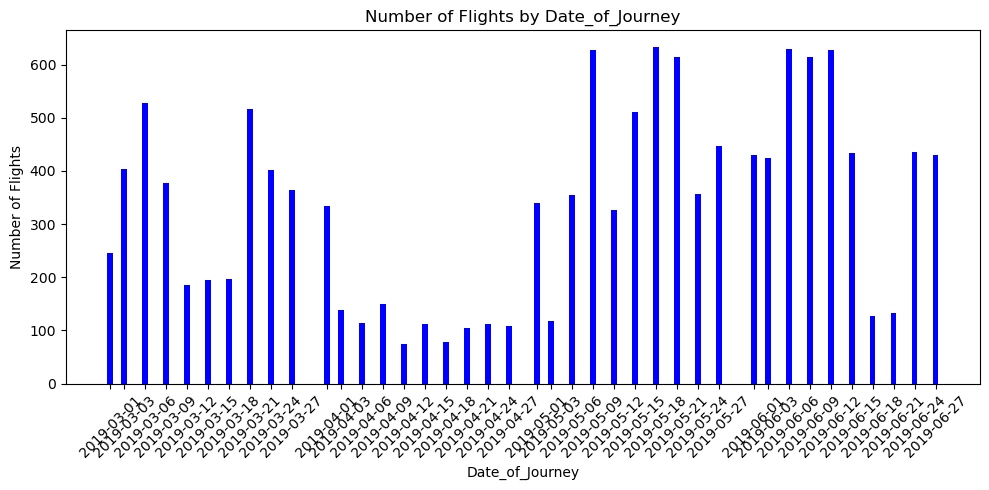

In [14]:
# plot number of flights by Date_of_Journey
journey_counts = combined_df['Date_of_Journey'].value_counts().sort_index()
plt.figure(figsize=(10, 5))

plt.bar(journey_counts.index, journey_counts.values, color='blue')
plt.title('Number of Flights by Date_of_Journey')
plt.xlabel('Date_of_Journey')
plt.ylabel('Number of Flights')
plt.xticks(journey_counts.index, journey_counts.index.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()


In [15]:
# # Swap dates where Arrival date is earlier than Journey date
# condition = combined_df['Arrival_Day'] < combined_df['Journey_Day']
# combined_df.loc[condition, 'Arrival_Day'] = combined_df.loc[condition, 'Journey_Day']

In [16]:
# combined_df.drop(['Arrival_Date','Date_of_Journey'], axis=1, inplace=True)

In [17]:
combined_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
# Apply the mapping to the 'Total_Stops' column
stops_mapping = {'non-stop': 0,'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
combined_df['Total_Stops'] = combined_df['Total_Stops'].map(stops_mapping)

combined_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
# Replace 'No info' with 'No Info'
combined_df['Additional_Info'] = combined_df['Additional_Info'].replace('No info', 'No Info')

In [20]:
# Convert Dep_Time to datetime format
combined_df['Dep_Time'] = pd.to_datetime(combined_df['Dep_Time'])

# Convert Arrival_Time to datetime format
combined_df['Arrival_Time'] = pd.to_datetime(combined_df['Arrival_Time'] )


In [21]:
# combined_df.head()

In [22]:
combined_df['Diff_Duration'] = combined_df['Arrival_Time'] - combined_df['Dep_Time']

In [23]:
combined_df['Duration'] = pd.to_timedelta(combined_df['Duration'])

In [24]:
# combined_df.head(100)

In [25]:
combined_df[(combined_df['Duration'] != combined_df['Diff_Duration'])]

Airline Date_of_Journey    Source  \
0                                 IndiGo      2019-03-24  Banglore   
2                            Jet Airways      2019-06-09     Delhi   
6                            Jet Airways      2019-03-12  Banglore   
7                            Jet Airways      2019-03-01  Banglore   
8                            Jet Airways      2019-03-12  Banglore   
13                           Jet Airways      2019-05-09   Kolkata   
15                             Air India      2019-03-03     Delhi   
17                           Jet Airways      2019-06-12     Delhi   
18                             Air India      2019-06-12     Delhi   
19                           Jet Airways      2019-05-27     Delhi   
21                             Air India      2019-03-21  Banglore   
24                           Jet Airways      2019-05-06   Kolkata   
25                           Jet Airways      2019-06-09     Delhi   
26                                IndiGo      2019-06-01     Delhi   
33                           Jet Airways      2019-06-15     Delhi   
42                           Jet Airways      2019-05-18     Delhi   
48                             Air India      2019-05-15   Kolkata   
49                           Jet Airways      2019-06-27     Delhi   
51                           Jet Airways      2019-05-01   Kolkata   
52                                IndiGo      2019-03-24  Banglore   
53                                IndiGo      2019-06-18  Banglore   
54                              Air Asia      2019-04-03  Banglore   
55                           Jet Airways      2019-03-24   Kolkata   
58                     Multiple carriers      2019-05-06     Delhi   
59                               Vistara      2019-03-06    Mumbai   
61                             Air India      2019-04-03     Delhi   
63                                IndiGo      2019-05-15     Delhi   
71                           Jet Airways      2019-03-09  Banglore   
73                           Jet Airways      2019-06-24     Delhi   
78                           Jet Airways      2019-06-15     Delhi   
80                           Jet Airways      2019-06-09   Kolkata   
82                           Jet Airways      2019-05-06   Kolkata   
85                           Jet Airways      2019-03-06  Banglore   
87                           Jet Airways      2019-06-06     Delhi   
89                           Jet Airways      2019-05-24   Kolkata   
92                           Jet Airways      2019-03-12  Banglore   
99                           Jet Airways      2019-06-12     Delhi   
101                          Jet Airways      2019-06-09   Kolkata   
102                          Jet Airways      2019-06-24     Delhi   
103                            Air India      2019-05-12   Kolkata   
105                          Jet Airways      2019-05-18     Delhi   
108                            Air India      2019-05-09     Delhi   
109                          Jet Airways      2019-05-24     Delhi   
110                          Jet Airways      2019-03-18  Banglore   
112                              Vistara      2019-05-12   Kolkata   
113                          Jet Airways      2019-03-06     Delhi   
116                            Air India      2019-03-06     Delhi   
117                    Multiple carriers      2019-03-03     Delhi   
122                          Jet Airways      2019-05-06   Kolkata   
123                            Air India      2019-03-01     Delhi   
125                            Air India      2019-05-21   Kolkata   
126                          Jet Airways      2019-06-12   Kolkata   
127                          Jet Airways      2019-05-06   Kolkata   
131                          Jet Airways      2019-06-15     Delhi   
134                    Multiple carriers      2019-05-21     Delhi   
135                          Jet Airways      2019-05-18     Delhi   
136                          Jet Airways   

In [26]:
# Update 'Arrival_Day' and 'Arrival_Time' for those rows
condition = combined_df['Duration'] != combined_df['Diff_Duration']
rows_to_update = combined_df[condition]

new_arrival_time = rows_to_update['Dep_Time'] + rows_to_update['Duration']

combined_df.loc[condition, 'Arrival_Day'] = new_arrival_time.dt.day
combined_df.loc[condition, 'Arrival_Time'] = new_arrival_time
combined_df['Diff_Duration'] = combined_df['Arrival_Time'] - combined_df['Dep_Time']

In [27]:
combined_df[(combined_df['Duration'] != combined_df['Diff_Duration'])]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, Arrival_Date, Journey_Day, Journey_Month, Arrival_Day, Arrival_Month, Diff_Duration]
Index: []

In [28]:
combined_df.drop(['Diff_Duration'], axis=1, inplace=True)

In [29]:
combined_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time        Duration  Total_Stops  \
0 2024-05-14 22:20:00 2024-05-15 01:10:00 0 days 02:50:00            0   
1 2024-05-14 05:50:00 2024-05-14 13:15:00 0 days 07:25:00            2   
2 2024-05-14 09:25:00 2024-05-15 04:25:00 0 days 19:00:00            2   
3 2024-05-14 18:05:00 2024-05-14 23:30:00 0 days 05:25:00            1   
4 2024-05-14 16:50:00 2024-05-14 21:35:00 0 days 04:45:00            1   

  Additional_Info    Price Arrival_Date  Journey_Day  Journey_Month  \
0         No Info   3897.0   1900-03-22           24              3   
1         No Info   7662.0   2019-05-01            1              5   
2         No Info  13882.0   1900-06-10            9              6   
3         No Info   6218.0   2019-05-12           12              5   
4         No Info  13302.0   2019-03-01            1              3   

   Arrival_Day  Arrival_Month  
0           15              3  
1            1              5  
2           15              6  
3           12              5  
4            1              3

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          13354 non-null  object         
 1   Date_of_Journey  13354 non-null  datetime64[ns] 
 2   Source           13354 non-null  object         
 3   Destination      13354 non-null  object         
 4   Route            13354 non-null  object         
 5   Dep_Time         13354 non-null  datetime64[ns] 
 6   Arrival_Time     13354 non-null  datetime64[ns] 
 7   Duration         13354 non-null  timedelta64[ns]
 8   Total_Stops      13354 non-null  int64          
 9   Additional_Info  13354 non-null  object         
 10  Price            10683 non-null  float64        
 11  Arrival_Date     13354 non-null  datetime64[ns] 
 12  Journey_Day      13354 non-null  int64          
 13  Journey_Month    13354 non-null  int64          
 14  Arrival_Day      13354

In [31]:
# Extract Houe and Minute from date_time formats
combined_df['Dep_Hour'] = combined_df['Dep_Time'].dt.hour
combined_df['Dep_Minute'] = combined_df['Dep_Time'].dt.minute
combined_df['Arrival_Hour'] = combined_df['Arrival_Time'].dt.hour
combined_df['Arrival_Minute'] = combined_df['Arrival_Time'].dt.minute

# Calculate Duration in minute
combined_df['Duration'] = (combined_df['Arrival_Time'] - combined_df['Dep_Time']).dt.total_seconds() / 60

# Drop original datetime columns
combined_df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)


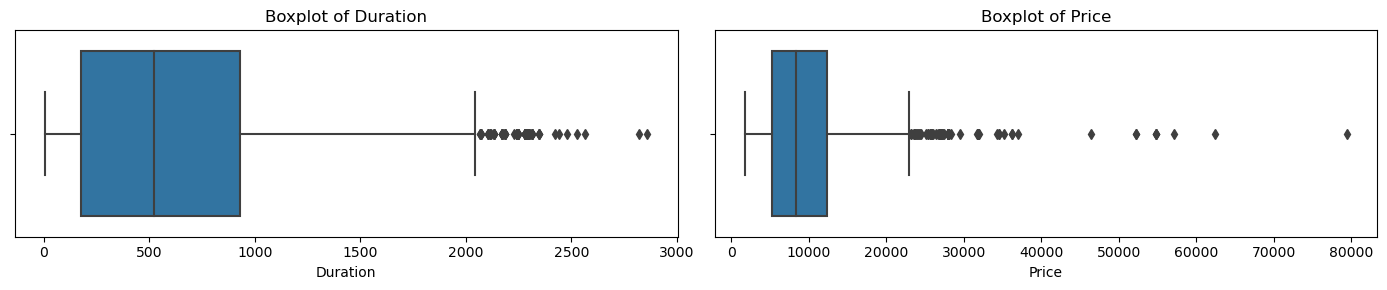

In [32]:
# Selecting columns to plot Boxplot
numerical_columns = ['Duration', 'Price']

fig, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(14, 3))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=combined_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

In [33]:
combined_df['Additional_Info'].value_counts()

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [34]:
combined_df['airline_speciality'] = combined_df['Airline'].apply(lambda x: 'Premium economy' if 'Premium economy' in x else ('Business' if 'Business' in x else '0'))

In [35]:
combined_df['Airline'] = combined_df['Airline'].str.replace(' Premium economy', '')
combined_df['Airline'] = combined_df['Airline'].str.replace(' Business', '')

In [36]:
combined_df['In-flight_meal'] = np.where(combined_df['Additional_Info'] == 'In-flight meal not included', 0, 1)


In [37]:
combined_df['layover'] = np.where(combined_df['Additional_Info'].astype(str).str.contains('layover', case=False), 0, 1)


In [38]:
# combined_df[combined_df['Additional_Info'].str.contains('layover', case=False, na=False)]

In [39]:
combined_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

   Duration  Total_Stops Additional_Info    Price Arrival_Date  Journey_Day  \
0     170.0            0         No Info   3897.0   1900-03-22           24   
1     445.0            2         No Info   7662.0   2019-05-01            1   
2    1140.0            2         No Info  13882.0   1900-06-10            9   
3     325.0            1         No Info   6218.0   2019-05-12           12   
4     285.0            1         No Info  13302.0   2019-03-01            1   

   Journey_Month  Arrival_Day  Arrival_Month  Dep_Hour  Dep_Minute  \
0              3           15              3        22          20   
1              5            1              5         5          50   
2              6           15              6         9          25   
3              5           12              5        18           5   
4              3            1              3        16          50   

   Arrival_Hour  Arrival_Minute airline_speciality  In-flight_meal  layover  
0             1              10                  0               1        1  
1            13              15                  0               1        1  
2             4              25                  0               1        1  
3            23              30                  0               1        1  
4            21              35                  0               1        1

In [40]:
print(f'Column_name\t unique_values \t {"DataType".rjust(10)} \t {"Minimum".rjust(15)} \t {"Maximum".rjust(10)} ')
for colum in combined_df.columns:
    print(f'{colum.center(20)} {str(len(combined_df[colum].unique())).rjust(5)} \t {str(combined_df[colum].dtype).rjust(10)} \t {str(combined_df[colum].min()).rjust(15)} \t {str(combined_df[colum].max()).rjust(10)}')

Column_name	 unique_values 	   DataType 	         Minimum 	    Maximum 
      Airline            9 	     object 	        Air Asia 	    Vistara
  Date_of_Journey       40 	 datetime64[ns] 	 2019-03-01 00:00:00 	 2019-06-27 00:00:00
       Source            5 	     object 	        Banglore 	     Mumbai
    Destination          6 	     object 	        Banglore 	  New Delhi
       Route           132 	     object 	 BLR → AMD → DEL 	  MAA → CCU
      Duration         374 	    float64 	             5.0 	     2860.0
    Total_Stops          5 	      int64 	               0 	          4
  Additional_Info        9 	     object 	  1 Long layover 	 Red-eye flight
       Price          1871 	    float64 	          1759.0 	    79512.0
    Arrival_Date        95 	 datetime64[ns] 	 1900-03-02 00:00:00 	 2019-06-27 00:00:00
    Journey_Day         10 	      int64 	               1 	         27
   Journey_Month         4 	      int64 	               3 	          6
    Arrival_Day         12 	      int6

In [41]:
reference_date = pd.to_datetime('1/1/2020')
combined_df['day_diff'] = (reference_date - combined_df['Date_of_Journey']).dt.days

In [42]:
combined_df['Arrival_Date'] = combined_df['Arrival_Date'].apply(lambda x: x.replace(year=2019) if x.year != 2019 else x)


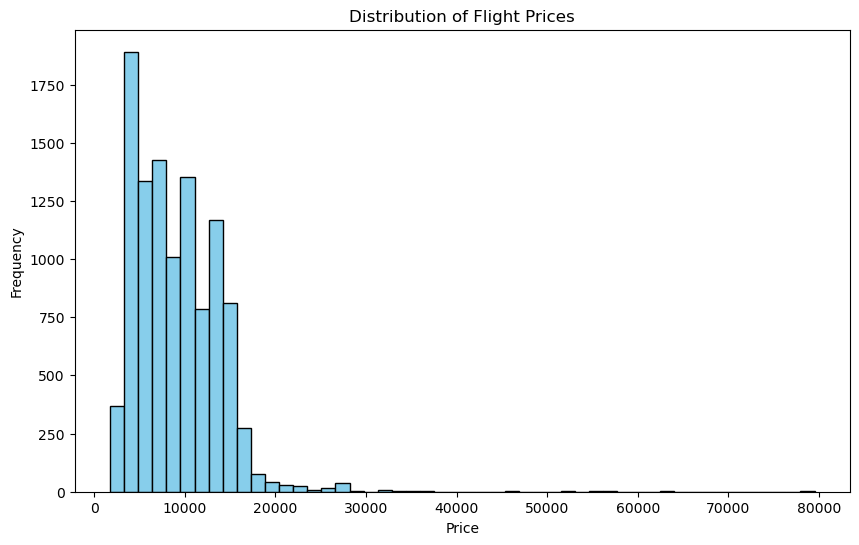

In [43]:
import matplotlib.pyplot as plt

# Plotting the distribution of 'Price'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

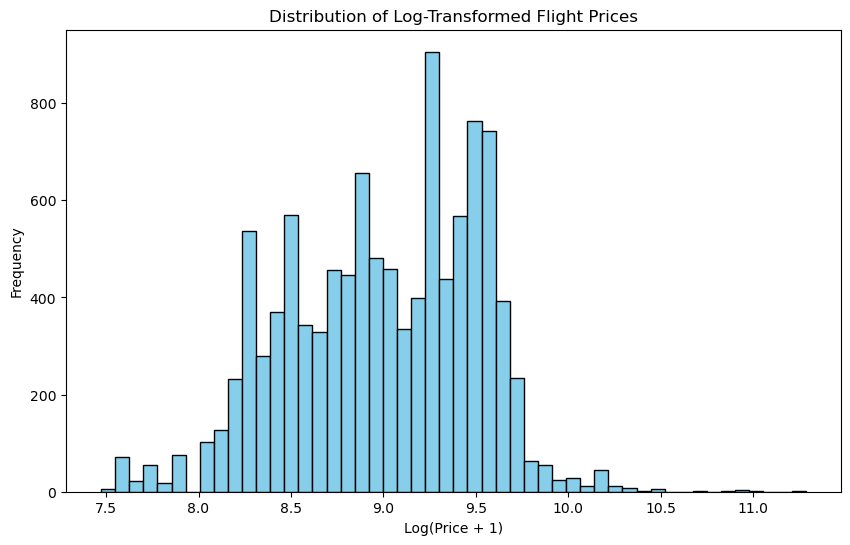

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Log transform the 'Price' column
combined_df['Log_Price'] = np.log1p(combined_df['Price'])

# Plot the distribution of the log-transformed 'Price'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Log_Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Flight Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


In [45]:
combined_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

   Duration  Total_Stops Additional_Info    Price Arrival_Date  Journey_Day  \
0     170.0            0         No Info   3897.0   2019-03-22           24   
1     445.0            2         No Info   7662.0   2019-05-01            1   
2    1140.0            2         No Info  13882.0   2019-06-10            9   
3     325.0            1         No Info   6218.0   2019-05-12           12   
4     285.0            1         No Info  13302.0   2019-03-01            1   

   Journey_Month  Arrival_Day  Arrival_Month  Dep_Hour  Dep_Minute  \
0              3           15              3        22          20   
1              5            1              5         5          50   
2              6           15              6         9          25   
3              5           12              5        18           5   
4              3            1              3        16          50   

   Arrival_Hour  Arrival_Minute airline_speciality  In-flight_meal  layover  \
0             1              10                  0               1        1   
1            13              15                  0               1        1   
2             4              25                  0               1        1   
3            23              30                  0               1        1   
4            21              35                  0               1        1   

   day_diff  Log_Price  
0       283   8.268219  
1       245   8.944159  
2       206   9.538420  
3       234   8.735364  
4       306   9.495745

In [46]:
combined_df['Num_Layovers'] = combined_df['Route'].str.count('→')

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
for column in categorical_columns:
    combined_df[column] = le.fit_transform(combined_df[column])

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'airline_speciality']


C:\Users\as429\AppData\Local\Temp\ipykernel_16520\1241490789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix  = combined_df.corr()


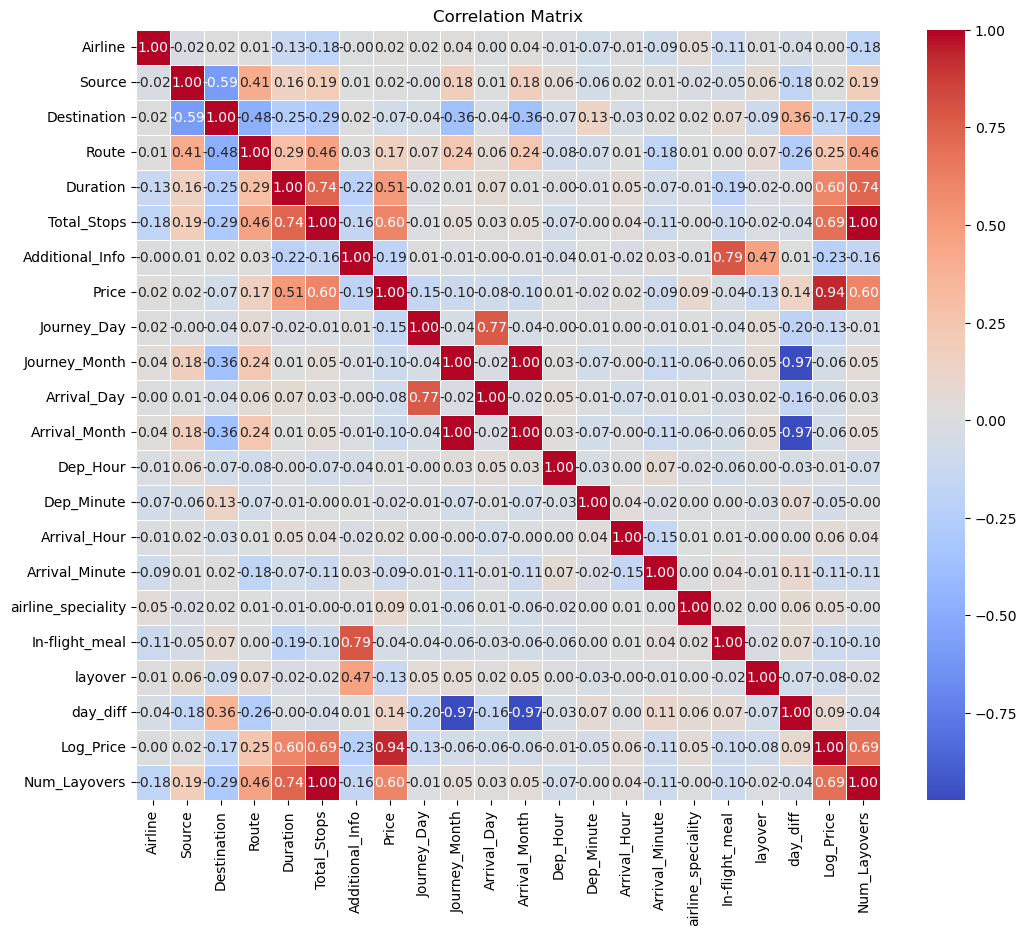

In [48]:
correlation_matrix  = combined_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
combined_df.drop(['Total_Stops','Arrival_Month'], axis=1, inplace=True)

In [50]:
#Moving Price column to last index
price_column = combined_df.pop('Price')
combined_df['Price'] = price_column

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_scale = combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_scale.remove('Price')
features_to_scale.remove('Log_Price') 

scaler = StandardScaler()
combined_df[features_to_scale] = scaler.fit_transform(combined_df[features_to_scale])


In [52]:
combined_df.drop(['Date_of_Journey','Arrival_Date'], axis=1,inplace=True)

In [53]:
#Splitting Train and test data based on presence of Price
train_data = combined_df[combined_df['Price'].notnull()]
test_data = combined_df[combined_df['Price'].isnull()]

In [54]:
test_data = test_data.drop(columns=['Price','Log_Price'])

In [55]:
test_data.head()

Airline  Source  Destination  Route  Duration  Additional_Info  \
10683        4       2            1    108  0.024822                6   
10684        3       3            0     94 -0.794210                6   
10685        4       2            1    108  1.544471                5   
10686        5       2            1    108  0.271518                6   
10687        0       0            2     18 -0.932359                6   

       Journey_Day  Journey_Month  Arrival_Day  Dep_Hour  Dep_Minute  \
10683    -0.875704       1.106255     0.130338  0.782200    0.291675   
10684    -0.164698       0.248312    -0.324069 -1.135493   -0.239345   
10685     0.901811       0.248312     0.130338  1.130872   -0.504855   
10686     0.901811       0.248312     1.039151 -0.786822   -1.301385   
10687     1.257314       1.106255     0.130338  1.828215    1.619226   

       Arrival_Hour  Arrival_Minute  airline_speciality  In-flight_meal  \
10683     -1.361940        0.020559                   0               1   
10684     -0.492079       -0.281466                   0               1   
10685      0.812713       -1.489565                   0               0   
10686      1.102667       -1.489565                   0               1   
10687     -1.651894        1.228657                   0               1   

       layover  day_diff  Num_Layovers  
10683        1 -0.885815      0.257871  
10684        1 -0.198657      0.257871  
10685        1 -0.446034      0.257871  
10686        1 -0.446034      0.257871  
10687        1 -1.380569     -1.224526

In [56]:
train_data.head()

Airline  Source  Destination  Route  Duration  Additional_Info  \
0        3       0            5     18 -0.932359                6   
1        1       3            0     87 -0.389628                6   
2        4       2            1    122  0.982003                6   
3        3       3            0     95 -0.626456                6   
4        3       0            5     29 -0.705399                6   

   Journey_Day  Journey_Month  Arrival_Day  Dep_Hour  Dep_Minute  \
0     1.257314      -1.467576     0.130338  1.653879   -0.239345   
1    -1.468210       0.248312    -1.990228 -1.309829    1.353715   
2    -0.520201       1.106255     0.130338 -0.612486    0.026165   
3    -0.164698       0.248312    -0.324069  0.956536   -1.035875   
4    -1.468210      -1.467576    -1.990228  0.607864    1.353715   

   Arrival_Hour  Arrival_Minute  airline_speciality  In-flight_meal  layover  \
0     -1.796871       -0.885515                   0               1        1   
1     -0.057148       -0.583491                   0               1        1   
2     -1.361940        0.020559                   0               1        1   
3      1.392621        0.322583                   0               1        1   
4      1.102667        0.624608                   0               1        1   

   day_diff  Log_Price  Num_Layovers    Price  
0  1.148172   8.268219     -1.224526   3897.0  
1  0.103692   8.944159      1.740268   7662.0  
2 -0.968274   9.538420      1.740268  13882.0  
3 -0.198657   8.735364      0.257871   6218.0  
4  1.780358   9.495745      0.257871  13302.0

In [57]:
X = train_data.drop(columns=['Price','Log_Price'])  # Features (all columns except 'Price')
y = train_data['Log_Price']  # Target variable ('Price')

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [60]:


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'k-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=3000),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(verbose=0),
    'CatBoost': CatBoostRegressor(verbose=0) 
}

# Train the models and evaluate
best_model = None
best_mse = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test,y_test)
    
    print(f"Mean Squared Error ({name}): {mse} , Score : {score}")
    
 
    if mse < best_mse:
        best_mse = mse
        best_score= score
        best_model = model

print(f"The best model is {type(best_model).__name__} with an MSE of {best_mse} and score {best_score}")


Mean Squared Error (Linear Regression): 0.10671593479455002 , Score : 0.5757734897486938
Mean Squared Error (Ridge Regression): 0.10796793576669944 , Score : 0.5707964260677287
Mean Squared Error (Lasso Regression): 0.23713714395682495 , Score : 0.05731170114902928
Mean Squared Error (Random Forest): 0.014930012287744656 , Score : 0.9406489103709514
Mean Squared Error (Gradient Boosting): 0.030478831731813708 , Score : 0.8788378844544926
Mean Squared Error (Support Vector Machine): 0.09802251654185073 , Score : 0.6103323257331954
Mean Squared Error (k-Nearest Neighbors): 0.029824777645922795 , Score : 0.8814379374166608
Mean Squared Error (Neural Network): 0.06500241222943523 , Score : 0.7415967301312678
Mean Squared Error (Gaussian Process): 9.978905807988186 , Score : -38.669018457265246
Mean Squared Error (XGBoost): 0.013146962926958054 , Score : 0.9477370440164898
Mean Squared Error (LightGBM): 0.015604086331023068 , Score : 0.9379692723245667
Mean Squared Error (CatBoost): 0.01371

In [61]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for XGBoost
top_params_xgboost = []

# Define the objective function for XGBoost optimization
def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = XGBRegressor(**params, objective='reg:squarederror', verbosity=0)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for XGBoost
    top_params_xgboost.append((mse, params))
    top_params_xgboost.sort()

    return mse

# Create the Optuna study and optimize the objective function for XGBoost
study_xgboost = optuna.create_study(direction='minimize')
study_xgboost.optimize(objective_xgboost, n_trials=150)

# Print the top 3 best parameters for XGBoost
print("Top 3 Best Parameters for XGBoost:")
for i, (mse, params) in enumerate(top_params_xgboost[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-14 15:30:18,587] A new study created in memory with name: no-name-81459b8e-5588-4c86-abab-b9f03ac4f44b
[I 2024-05-14 15:30:24,889] Trial 0 finished with value: 0.013362040809648102 and parameters: {'n_estimators': 1551, 'max_depth': 6, 'learning_rate': 0.1709902661055697, 'subsample': 0.7771888461655825, 'colsample_bytree': 0.5934549297453171}. Best is trial 0 with value: 0.013362040809648102.
[I 2024-05-14 15:30:53,280] Trial 1 finished with value: 0.01236272054312158 and parameters: {'n_estimators': 1819, 'max_depth': 8, 'learning_rate': 0.03623503322194056, 'subsample': 0.663741830139553, 'colsample_bytree': 0.7538206532219789}. Best is trial 1 with value: 0.01236272054312158.
[I 2024-05-14 15:31:28,039] Trial 2 finished with value: 0.012982014145782851 and parameters: {'n_estimators': 1903, 'max_depth': 9, 'learning_rate': 0.026921889951150288, 'subsample': 0.6782114610353256, 'colsample_bytree': 0.928493674398158}. Best is trial 1 with value: 0.01236272054312158.
[I 202

[I 2024-05-14 15:37:25,096] Trial 28 finished with value: 0.01225118646687303 and parameters: {'n_estimators': 4355, 'max_depth': 4, 'learning_rate': 0.06245555386177758, 'subsample': 0.7188902946981509, 'colsample_bytree': 0.7996427358411893}. Best is trial 15 with value: 0.01205532210327746.
[I 2024-05-14 15:37:38,830] Trial 29 finished with value: 0.013317778764517521 and parameters: {'n_estimators': 2786, 'max_depth': 6, 'learning_rate': 0.15672296925057758, 'subsample': 0.8071494090904334, 'colsample_bytree': 0.8317767351359472}. Best is trial 15 with value: 0.01205532210327746.
[I 2024-05-14 15:37:47,217] Trial 30 finished with value: 0.013590710027579004 and parameters: {'n_estimators': 3165, 'max_depth': 3, 'learning_rate': 0.1214779225764205, 'subsample': 0.7766657714887936, 'colsample_bytree': 0.7284984059150861}. Best is trial 15 with value: 0.01205532210327746.
[I 2024-05-14 15:37:51,557] Trial 31 finished with value: 0.013074873021817065 and parameters: {'n_estimators': 13

[I 2024-05-14 15:41:40,750] Trial 56 finished with value: 0.01209985375091424 and parameters: {'n_estimators': 1843, 'max_depth': 6, 'learning_rate': 0.059668230051009255, 'subsample': 0.7370432228852328, 'colsample_bytree': 0.5425998781043323}. Best is trial 52 with value: 0.011785337331650676.
[I 2024-05-14 15:41:50,345] Trial 57 finished with value: 0.012263428937166506 and parameters: {'n_estimators': 1504, 'max_depth': 7, 'learning_rate': 0.04809474146230571, 'subsample': 0.7022566404105697, 'colsample_bytree': 0.6394616922232267}. Best is trial 52 with value: 0.011785337331650676.
[I 2024-05-14 15:41:55,128] Trial 58 finished with value: 0.01368278115672344 and parameters: {'n_estimators': 1187, 'max_depth': 5, 'learning_rate': 0.03115626954822438, 'subsample': 0.7454136578619158, 'colsample_bytree': 0.5779932495127988}. Best is trial 52 with value: 0.011785337331650676.
[I 2024-05-14 15:42:07,502] Trial 59 finished with value: 0.012133563920128923 and parameters: {'n_estimators'

[I 2024-05-14 15:48:09,639] Trial 84 finished with value: 0.011873640095956855 and parameters: {'n_estimators': 3225, 'max_depth': 6, 'learning_rate': 0.04101930368683847, 'subsample': 0.8735599865238892, 'colsample_bytree': 0.5362383948250679}. Best is trial 78 with value: 0.011588288270311223.
[I 2024-05-14 15:48:27,478] Trial 85 finished with value: 0.011849907636532956 and parameters: {'n_estimators': 3647, 'max_depth': 5, 'learning_rate': 0.05628288065430209, 'subsample': 0.8826885831024771, 'colsample_bytree': 0.5514726624273951}. Best is trial 78 with value: 0.011588288270311223.
[I 2024-05-14 15:48:48,314] Trial 86 finished with value: 0.011667866925306096 and parameters: {'n_estimators': 2895, 'max_depth': 6, 'learning_rate': 0.030765174673416978, 'subsample': 0.8519649869780491, 'colsample_bytree': 0.5363674884635572}. Best is trial 78 with value: 0.011588288270311223.
[I 2024-05-14 15:49:10,590] Trial 87 finished with value: 0.01194540516022 and parameters: {'n_estimators': 

[I 2024-05-14 15:54:48,782] Trial 112 finished with value: 0.011728378248199396 and parameters: {'n_estimators': 2824, 'max_depth': 5, 'learning_rate': 0.045870805815150524, 'subsample': 0.8955604136594992, 'colsample_bytree': 0.5089960971366354}. Best is trial 103 with value: 0.011465471739582369.
[I 2024-05-14 15:55:01,008] Trial 113 finished with value: 0.011604633871012782 and parameters: {'n_estimators': 2969, 'max_depth': 6, 'learning_rate': 0.020272703419315533, 'subsample': 0.9118950158983825, 'colsample_bytree': 0.5278378999152685}. Best is trial 103 with value: 0.011465471739582369.
[I 2024-05-14 15:55:20,477] Trial 114 finished with value: 0.011771598018620684 and parameters: {'n_estimators': 3464, 'max_depth': 6, 'learning_rate': 0.03848607692082239, 'subsample': 0.9508505839608486, 'colsample_bytree': 0.5185281908617653}. Best is trial 103 with value: 0.011465471739582369.
[I 2024-05-14 15:55:33,409] Trial 115 finished with value: 0.011734421005780975 and parameters: {'n_e

[I 2024-05-14 16:00:57,371] Trial 140 finished with value: 0.011393850447823293 and parameters: {'n_estimators': 3382, 'max_depth': 6, 'learning_rate': 0.019208728177011743, 'subsample': 0.9680574182252725, 'colsample_bytree': 0.5258142008432058}. Best is trial 140 with value: 0.011393850447823293.
[I 2024-05-14 16:01:11,011] Trial 141 finished with value: 0.011353081860320623 and parameters: {'n_estimators': 3283, 'max_depth': 6, 'learning_rate': 0.019109989231768723, 'subsample': 0.9734488647307814, 'colsample_bytree': 0.5227977583101678}. Best is trial 141 with value: 0.011353081860320623.
[I 2024-05-14 16:01:26,185] Trial 142 finished with value: 0.011379754719386648 and parameters: {'n_estimators': 3417, 'max_depth': 6, 'learning_rate': 0.01886893291375645, 'subsample': 0.9670658210434915, 'colsample_bytree': 0.5301344745125968}. Best is trial 141 with value: 0.011353081860320623.
[I 2024-05-14 16:01:43,277] Trial 143 finished with value: 0.011486685933291276 and parameters: {'n_e

Top 3 Best Parameters for XGBoost:
  Rank 1: Mean Squared Error = 0.011353081860320623, Parameters = {'n_estimators': 3283, 'max_depth': 6, 'learning_rate': 0.019109989231768723, 'subsample': 0.9734488647307814, 'colsample_bytree': 0.5227977583101678}
  Rank 2: Mean Squared Error = 0.011379754719386648, Parameters = {'n_estimators': 3417, 'max_depth': 6, 'learning_rate': 0.01886893291375645, 'subsample': 0.9670658210434915, 'colsample_bytree': 0.5301344745125968}
  Rank 3: Mean Squared Error = 0.011393850447823293, Parameters = {'n_estimators': 3382, 'max_depth': 6, 'learning_rate': 0.019208728177011743, 'subsample': 0.9680574182252725, 'colsample_bytree': 0.5258142008432058}


In [62]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for LightGBM
top_params_lightgbm = []

# Define the objective function for LightGBM optimization
def objective_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.35),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
#     params = {
#     'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
#     'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
#     'max_depth': trial.suggest_int('max_depth', -1, 20),  # -1 means no limit
#     'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 1.0),
#     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#     'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#     'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
#     'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#     'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
#     'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
#     'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
#     'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
#     'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
#     'random_state': 42,
#     'n_jobs': trial.suggest_categorical('n_jobs', [None, -1, 1]),  # Use -1 for all threads, None for default
# }
    model = LGBMRegressor( **params,verbose=-1)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for LightGBM
    top_params_lightgbm.append((mse, params))
    top_params_lightgbm.sort()

    return mse

# Create the Optuna study and optimize the objective function for LightGBM
study_lightgbm = optuna.create_study(direction='minimize')
study_lightgbm.optimize(objective_lightgbm, n_trials=150)

# Print the top 3 best parameters for LightGBM
print("Top 3 Best Parameters for LightGBM:")
for i, (mse, params) in enumerate(top_params_lightgbm[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-14 16:03:48,018] A new study created in memory with name: no-name-7d30ca5a-ffcc-442b-b473-8697fd40d102
[I 2024-05-14 16:03:49,151] Trial 0 finished with value: 0.015162910657937708 and parameters: {'n_estimators': 1001, 'max_depth': 3, 'num_leaves': 92, 'learning_rate': 0.3029716690496676, 'subsample': 0.6112557580304722, 'colsample_bytree': 0.6080120810421614}. Best is trial 0 with value: 0.015162910657937708.
[I 2024-05-14 16:03:51,597] Trial 1 finished with value: 0.020587045975392265 and parameters: {'n_estimators': 1674, 'max_depth': 4, 'num_leaves': 11, 'learning_rate': 0.01781506181727471, 'subsample': 0.7112864702383431, 'colsample_bytree': 0.7491087913627912}. Best is trial 0 with value: 0.015162910657937708.
[I 2024-05-14 16:03:52,777] Trial 2 finished with value: 0.015002026521006642 and parameters: {'n_estimators': 457, 'max_depth': 5, 'num_leaves': 45, 'learning_rate': 0.08012145024475127, 'subsample': 0.9409801487026364, 'colsample_bytree': 0.8512625643831291}.

[I 2024-05-14 16:06:55,266] Trial 26 finished with value: 0.011829866044538659 and parameters: {'n_estimators': 1253, 'max_depth': 7, 'num_leaves': 100, 'learning_rate': 0.09014648598808725, 'subsample': 0.7431240149787797, 'colsample_bytree': 0.576875058653698}. Best is trial 26 with value: 0.011829866044538659.
[I 2024-05-14 16:06:59,289] Trial 27 finished with value: 0.011855542137243102 and parameters: {'n_estimators': 1034, 'max_depth': 7, 'num_leaves': 100, 'learning_rate': 0.0829674047973797, 'subsample': 0.8048421863950285, 'colsample_bytree': 0.5809598259614525}. Best is trial 26 with value: 0.011829866044538659.
[I 2024-05-14 16:07:04,726] Trial 28 finished with value: 0.011449562414514593 and parameters: {'n_estimators': 966, 'max_depth': 9, 'num_leaves': 99, 'learning_rate': 0.05780491662869815, 'subsample': 0.8047427341844936, 'colsample_bytree': 0.5745498996608361}. Best is trial 28 with value: 0.011449562414514593.
[I 2024-05-14 16:07:10,754] Trial 29 finished with value

[I 2024-05-14 16:09:43,424] Trial 53 finished with value: 0.011530372266230937 and parameters: {'n_estimators': 3562, 'max_depth': 8, 'num_leaves': 69, 'learning_rate': 0.02400812295787587, 'subsample': 0.8036528643441272, 'colsample_bytree': 0.6410831179755274}. Best is trial 41 with value: 0.011406909167335607.
[I 2024-05-14 16:09:51,828] Trial 54 finished with value: 0.011410980289860557 and parameters: {'n_estimators': 2254, 'max_depth': 8, 'num_leaves': 48, 'learning_rate': 0.03824431141228987, 'subsample': 0.7392617850474665, 'colsample_bytree': 0.5579778689390956}. Best is trial 41 with value: 0.011406909167335607.
[I 2024-05-14 16:09:57,869] Trial 55 finished with value: 0.01169087728833014 and parameters: {'n_estimators': 1531, 'max_depth': 9, 'num_leaves': 46, 'learning_rate': 0.051760616183327245, 'subsample': 0.7435924973584387, 'colsample_bytree': 0.6053282818643133}. Best is trial 41 with value: 0.011406909167335607.
[I 2024-05-14 16:10:05,569] Trial 56 finished with valu

[I 2024-05-14 16:13:40,752] Trial 80 finished with value: 0.0115831120536617 and parameters: {'n_estimators': 1850, 'max_depth': 10, 'num_leaves': 67, 'learning_rate': 0.04373907463052734, 'subsample': 0.7191183639375892, 'colsample_bytree': 0.5121276518417345}. Best is trial 78 with value: 0.011377610715596523.
[I 2024-05-14 16:13:51,182] Trial 81 finished with value: 0.01161339449608468 and parameters: {'n_estimators': 2059, 'max_depth': 10, 'num_leaves': 59, 'learning_rate': 0.01867090604500818, 'subsample': 0.68907373612179, 'colsample_bytree': 0.5587957494791567}. Best is trial 78 with value: 0.011377610715596523.
[I 2024-05-14 16:14:01,860] Trial 82 finished with value: 0.011689641400873828 and parameters: {'n_estimators': 2199, 'max_depth': 10, 'num_leaves': 64, 'learning_rate': 0.06695946693944829, 'subsample': 0.7751196739096511, 'colsample_bytree': 0.5513368651210984}. Best is trial 78 with value: 0.011377610715596523.
[I 2024-05-14 16:14:12,158] Trial 83 finished with value:

[I 2024-05-14 16:18:25,971] Trial 106 finished with value: 0.01127858656345708 and parameters: {'n_estimators': 2601, 'max_depth': 10, 'num_leaves': 60, 'learning_rate': 0.03183324291871536, 'subsample': 0.7871436321172794, 'colsample_bytree': 0.5998853990144559}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:18:46,172] Trial 107 finished with value: 0.011305465435517359 and parameters: {'n_estimators': 2660, 'max_depth': 10, 'num_leaves': 61, 'learning_rate': 0.030597001944089746, 'subsample': 0.7844103651645356, 'colsample_bytree': 0.6031400768919769}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:19:08,707] Trial 108 finished with value: 0.011389229816988549 and parameters: {'n_estimators': 2985, 'max_depth': 10, 'num_leaves': 68, 'learning_rate': 0.031059079300395483, 'subsample': 0.7882162399237646, 'colsample_bytree': 0.6026471259603672}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:19:36,145] Trial 109 finishe

[I 2024-05-14 16:28:06,869] Trial 132 finished with value: 0.017385272977308967 and parameters: {'n_estimators': 4055, 'max_depth': 3, 'num_leaves': 58, 'learning_rate': 0.030278597639738235, 'subsample': 0.7795847126476576, 'colsample_bytree': 0.6619779254569057}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:28:25,243] Trial 133 finished with value: 0.011655878570252172 and parameters: {'n_estimators': 3615, 'max_depth': 10, 'num_leaves': 63, 'learning_rate': 0.039727552897290484, 'subsample': 0.805523955897416, 'colsample_bytree': 0.6093957327122552}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:28:47,312] Trial 134 finished with value: 0.011828627884970369 and parameters: {'n_estimators': 3323, 'max_depth': 10, 'num_leaves': 60, 'learning_rate': 0.04644125224188005, 'subsample': 0.7721976733573784, 'colsample_bytree': 0.6367798348255891}. Best is trial 105 with value: 0.011269107555418684.
[I 2024-05-14 16:29:09,954] Trial 135 finished

Top 3 Best Parameters for LightGBM:
  Rank 1: Mean Squared Error = 0.011250830278954398, Parameters = {'n_estimators': 3036, 'max_depth': 10, 'num_leaves': 62, 'learning_rate': 0.025235861199313925, 'subsample': 0.7938041343821287, 'colsample_bytree': 0.6300802140557137}
  Rank 2: Mean Squared Error = 0.011254252439534332, Parameters = {'n_estimators': 2809, 'max_depth': 10, 'num_leaves': 58, 'learning_rate': 0.029090110140017722, 'subsample': 0.7729686874939952, 'colsample_bytree': 0.648373944967043}
  Rank 3: Mean Squared Error = 0.01125573706072866, Parameters = {'n_estimators': 2855, 'max_depth': 10, 'num_leaves': 58, 'learning_rate': 0.028096817346099923, 'subsample': 0.780944757273296, 'colsample_bytree': 0.6256139845181754}


In [63]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for CatBoost
top_params_catboost = []

# Define the objective function for CatBoost optimization
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 5000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0),
    }
    model = CatBoostRegressor(**params, verbose=0)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for CatBoost
    top_params_catboost.append((mse, params))
    top_params_catboost.sort()

    return mse

# Create the Optuna study and optimize the objective function for CatBoost
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=150)

# Print the top 3 best parameters for CatBoost
print("Top 3 Best Parameters for CatBoost:")
for i, (mse, params) in enumerate(top_params_catboost[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-14 16:32:20,891] A new study created in memory with name: no-name-349382dd-8c77-4b92-9a7f-98084c83a161
[I 2024-05-14 16:32:33,370] Trial 0 finished with value: 0.011774511865039855 and parameters: {'iterations': 2809, 'depth': 5, 'learning_rate': 0.12743033110187404, 'random_strength': 0.7725688690415324, 'bagging_temperature': 0.43647834107468286, 'border_count': 228, 'l2_leaf_reg': 6.25159665265205}. Best is trial 0 with value: 0.011774511865039855.
[I 2024-05-14 16:32:49,348] Trial 1 finished with value: 0.011930062234186188 and parameters: {'iterations': 2570, 'depth': 7, 'learning_rate': 0.25891542608376555, 'random_strength': 0.9051509901798755, 'bagging_temperature': 0.44046680068533617, 'border_count': 94, 'l2_leaf_reg': 7.004111313456125}. Best is trial 0 with value: 0.011774511865039855.
[I 2024-05-14 16:33:51,982] Trial 2 finished with value: 0.013176154107768864 and parameters: {'iterations': 3492, 'depth': 10, 'learning_rate': 0.2629461774299784, 'random_strengt

[I 2024-05-14 16:41:48,016] Trial 23 finished with value: 0.011374175409148124 and parameters: {'iterations': 4409, 'depth': 7, 'learning_rate': 0.10157502644823047, 'random_strength': 0.4745682841832436, 'bagging_temperature': 0.2758378282732436, 'border_count': 198, 'l2_leaf_reg': 4.95518303810546}. Best is trial 23 with value: 0.011374175409148124.
[I 2024-05-14 16:42:09,829] Trial 24 finished with value: 0.011547210390232859 and parameters: {'iterations': 4398, 'depth': 6, 'learning_rate': 0.10350515691278682, 'random_strength': 0.4873803809390508, 'bagging_temperature': 0.26577278708053503, 'border_count': 201, 'l2_leaf_reg': 4.399967319201509}. Best is trial 23 with value: 0.011374175409148124.
[I 2024-05-14 16:42:30,030] Trial 25 finished with value: 0.01158859761444513 and parameters: {'iterations': 4552, 'depth': 5, 'learning_rate': 0.09921900875126141, 'random_strength': 0.44121952127019815, 'bagging_temperature': 0.12249725654712751, 'border_count': 153, 'l2_leaf_reg': 6.948

[I 2024-05-14 16:52:33,717] Trial 47 finished with value: 0.012734426586879026 and parameters: {'iterations': 4402, 'depth': 8, 'learning_rate': 0.011888780530166981, 'random_strength': 0.909574827646081, 'bagging_temperature': 0.4812514804412633, 'border_count': 205, 'l2_leaf_reg': 4.607337537437116}. Best is trial 34 with value: 0.011213442480356953.
[I 2024-05-14 16:52:42,600] Trial 48 finished with value: 0.012275147423114965 and parameters: {'iterations': 1843, 'depth': 6, 'learning_rate': 0.06801666078017606, 'random_strength': 0.9451346512261136, 'bagging_temperature': 0.36572278318947604, 'border_count': 42, 'l2_leaf_reg': 3.9711958078216587}. Best is trial 34 with value: 0.011213442480356953.
[I 2024-05-14 16:53:19,122] Trial 49 finished with value: 0.011942284857876597 and parameters: {'iterations': 4156, 'depth': 8, 'learning_rate': 0.08375085646207964, 'random_strength': 0.8383682917481684, 'bagging_temperature': 0.6284443469574299, 'border_count': 242, 'l2_leaf_reg': 2.311

[I 2024-05-14 17:04:10,232] Trial 71 finished with value: 0.011556241750745445 and parameters: {'iterations': 4605, 'depth': 7, 'learning_rate': 0.028524645223296098, 'random_strength': 0.9704967203763399, 'bagging_temperature': 0.4953589799093433, 'border_count': 230, 'l2_leaf_reg': 3.676574874317463}. Best is trial 51 with value: 0.011172982495004976.
[I 2024-05-14 17:04:49,404] Trial 72 finished with value: 0.011234140043104574 and parameters: {'iterations': 4840, 'depth': 7, 'learning_rate': 0.03690773493826472, 'random_strength': 0.9336468755559569, 'bagging_temperature': 0.2870050038067474, 'border_count': 240, 'l2_leaf_reg': 2.89163680382408}. Best is trial 51 with value: 0.011172982495004976.
[I 2024-05-14 17:05:19,082] Trial 73 finished with value: 0.011292161895269886 and parameters: {'iterations': 4352, 'depth': 7, 'learning_rate': 0.053082813614593716, 'random_strength': 0.9306281240007621, 'bagging_temperature': 0.2894935918070737, 'border_count': 249, 'l2_leaf_reg': 2.902

[I 2024-05-14 17:18:30,142] Trial 95 finished with value: 0.01140192821489248 and parameters: {'iterations': 4725, 'depth': 7, 'learning_rate': 0.0637811196181318, 'random_strength': 0.9804726983664492, 'bagging_temperature': 0.5531620278314153, 'border_count': 248, 'l2_leaf_reg': 1.3481950659488346}. Best is trial 51 with value: 0.011172982495004976.
[I 2024-05-14 17:19:02,098] Trial 96 finished with value: 0.011337760474362815 and parameters: {'iterations': 4886, 'depth': 7, 'learning_rate': 0.033845906506758186, 'random_strength': 0.9610987870384898, 'bagging_temperature': 0.49380412874614654, 'border_count': 234, 'l2_leaf_reg': 2.0801755153779475}. Best is trial 51 with value: 0.011172982495004976.
[I 2024-05-14 17:19:30,784] Trial 97 finished with value: 0.011468041891777095 and parameters: {'iterations': 4485, 'depth': 7, 'learning_rate': 0.02432251707898419, 'random_strength': 0.9986719214592304, 'bagging_temperature': 0.5140404941530079, 'border_count': 248, 'l2_leaf_reg': 1.54

[I 2024-05-14 17:29:48,750] Trial 118 finished with value: 0.013512425132647141 and parameters: {'iterations': 4533, 'depth': 4, 'learning_rate': 0.04172272347066942, 'random_strength': 0.9150313587034826, 'bagging_temperature': 0.5811741690155985, 'border_count': 237, 'l2_leaf_reg': 1.4063443672694111}. Best is trial 104 with value: 0.011101197302553222.
[I 2024-05-14 17:30:20,671] Trial 119 finished with value: 0.011343894479834396 and parameters: {'iterations': 4793, 'depth': 7, 'learning_rate': 0.050796289091986, 'random_strength': 0.8895403817143178, 'bagging_temperature': 0.4501492050189472, 'border_count': 232, 'l2_leaf_reg': 2.205970875066647}. Best is trial 104 with value: 0.011101197302553222.
[I 2024-05-14 17:30:56,679] Trial 120 finished with value: 0.011872973767911348 and parameters: {'iterations': 4686, 'depth': 8, 'learning_rate': 0.07177948181738264, 'random_strength': 0.9463431557095761, 'bagging_temperature': 0.48796471158504134, 'border_count': 127, 'l2_leaf_reg': 1

[I 2024-05-14 17:41:28,638] Trial 141 finished with value: 0.011517599993228114 and parameters: {'iterations': 2465, 'depth': 7, 'learning_rate': 0.04363141809631361, 'random_strength': 0.978573588305326, 'bagging_temperature': 0.3663674552158752, 'border_count': 242, 'l2_leaf_reg': 1.9322474916118157}. Best is trial 104 with value: 0.011101197302553222.
[I 2024-05-14 17:42:09,736] Trial 142 finished with value: 0.011384441791207268 and parameters: {'iterations': 4781, 'depth': 7, 'learning_rate': 0.07753199804323804, 'random_strength': 0.9966651799476647, 'bagging_temperature': 0.4181172439789934, 'border_count': 250, 'l2_leaf_reg': 1.628383796333308}. Best is trial 104 with value: 0.011101197302553222.
[I 2024-05-14 17:42:31,891] Trial 143 finished with value: 0.011342771724992921 and parameters: {'iterations': 2605, 'depth': 7, 'learning_rate': 0.06717885447298903, 'random_strength': 0.9789082917750194, 'bagging_temperature': 0.3816776300019913, 'border_count': 245, 'l2_leaf_reg': 2

Top 3 Best Parameters for CatBoost:
  Rank 1: Mean Squared Error = 0.011101197302553222, Parameters = {'iterations': 4828, 'depth': 7, 'learning_rate': 0.05446208332709925, 'random_strength': 0.980903571391575, 'bagging_temperature': 0.5252248344238607, 'border_count': 252, 'l2_leaf_reg': 1.2581150742054683}
  Rank 2: Mean Squared Error = 0.011159975145389989, Parameters = {'iterations': 4893, 'depth': 7, 'learning_rate': 0.045851666675770945, 'random_strength': 0.9618882971672009, 'bagging_temperature': 0.3792082437224885, 'border_count': 249, 'l2_leaf_reg': 2.482667943660655}
  Rank 3: Mean Squared Error = 0.011161031924519216, Parameters = {'iterations': 4929, 'depth': 7, 'learning_rate': 0.044720915251911006, 'random_strength': 0.932916318342605, 'bagging_temperature': 0.5019128487476201, 'border_count': 251, 'l2_leaf_reg': 2.2502844485439084}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import optuna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for Random Forest
top_params_random_forest = []

# Define the objective function for Random Forest optimization
def objective_random_forest(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
#         'max_depth': trial.suggest_int('max_depth', 3, 20),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#     }
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error']),
        'max_samples': trial.suggest_float('max_samples', 0.1, 1.0, step=0.1),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5, step=0.1),
    }
    model = RandomForestRegressor(**params, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for Random Forest
    top_params_random_forest.append((mse, params))
    top_params_random_forest.sort()

    return mse

# Create the Optuna study and optimize the objective function for Random Forest
study_random_forest = optuna.create_study(direction='minimize')
study_random_forest.optimize(objective_random_forest, n_trials=150)

# Print the top 3 best parameters for Random Forest
print("Top 3 Best Parameters for Random Forest:")
for i, (mse, params) in enumerate(top_params_random_forest[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-14 17:44:51,368] A new study created in memory with name: no-name-7a875ad2-abcb-45b3-9d43-a7afaea32892
[I 2024-05-14 17:44:56,068] Trial 0 finished with value: 0.26171637400929965 and parameters: {'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'absolute_error', 'max_samples': 0.30000000000000004, 'min_weight_fraction_leaf': 0.5}. Best is trial 0 with value: 0.26171637400929965.
[I 2024-05-14 17:45:04,551] Trial 1 finished with value: 0.048143084445306586 and parameters: {'n_estimators': 369, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'absolute_error', 'max_samples': 0.1, 'min_weight_fraction_leaf': 0.0}. Best is trial 1 with value: 0.048143084445306586.


In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have X and y defined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for KNN
top_params_knn = []

# Define the objective function for KNN optimization
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 200)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2),
    if algorithm in['ball_tree', 'kd_tree']:
        leaf_size = trial.suggest_int('leaf_size',1,100)


    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for KNN
    top_params_knn.append((mse, {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm}))
    top_params_knn.sort(key=lambda x: x[0])

    return mse

# Create the Optuna study and optimize the objective function for KNN
study_knn = optuna.create_study(direction='minimize')
study_knn.optimize(objective_knn, n_trials=150)

# Print the top 3 best parameters for KNN
print("Top 3 Best Parameters for KNN:")
for i, (mse, params) in enumerate(top_params_knn[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


In [ ]:
best_params_catboost = [item[1] for item in top_params_catboost[:3]]
best_params_xgboost = [item[1] for item in top_params_xgboost[:3]]
best_params_lightgbm = [item[1] for item in top_params_lightgbm[:3]]
best_params_random_forest = [item[1] for item in top_params_random_forest[:3]]
best_params_knn = [item[1] for item in top_params_knn[:3]]


In [ ]:

models = {
    'CatBoost': CatBoostRegressor(**best_params_catboost[0], verbose=0),
    'CatBoost1': CatBoostRegressor(**best_params_catboost[1], verbose=0),
    'CatBoost2': CatBoostRegressor(**best_params_catboost[2], verbose=0),
    'XGBoost': XGBRegressor(**best_params_xgboost[0], objective='reg:squarederror', verbosity=0),
    'XGBoost1': XGBRegressor(**best_params_xgboost[1], objective='reg:squarederror', verbosity=0),
    'XGBoost2': XGBRegressor(**best_params_xgboost[2], objective='reg:squarederror', verbosity=0),
    'LightGBM': LGBMRegressor(**best_params_lightgbm[0], verbose=-1),
    'LightGBM1': LGBMRegressor(**best_params_lightgbm[1], verbose=-1),
    'LightGBM2': LGBMRegressor(**best_params_lightgbm[2], verbose=-1),
    'RandomForest': RandomForestRegressor(**best_params_random_forest[0], random_state=42),
    'RandomForest1': RandomForestRegressor(**best_params_random_forest[1], random_state=42),
    'RandomForest2': RandomForestRegressor(**best_params_random_forest[2], random_state=42),
    'knn': KNeighborsRegressor(**best_params_knn[0]),
    'knn1': KNeighborsRegressor(**best_params_knn[1]),
    'knn2': KNeighborsRegressor(**best_params_knn[2])   
}


In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


ensembles = {
    'Stacking': StackingRegressor(estimators=list(models.items()), final_estimator=Ridge(), cv=5),
    'Voting': VotingRegressor(estimators=list(models.items())),
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train and evaluate each ensemble method
for ensemble_name, ensemble_model in ensembles.items():
    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({ensemble_name}): {mse}")


In [ ]:
sum_prediction=0
model_predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_predictions[model_name] = predictions
    sum_prediction= predictions + sum_prediction
    mse= mean_squared_error(y_test, predictions)
    print(f'mean squared error - {model_name}: {mse}')
    
Ensemble_pred= sum_prediction/len(models)
Ensemble_mse= mean_squared_error(y_test, Ensemble_pred)
print(f'mean squared error - Ensemble: {Ensemble_mse}')    

In [ ]:
import itertools

prediction_sets = model_predictions

# Get the list of prediction set names
prediction_set_names = list(prediction_sets.keys())

# Define a function to compute the average of a list of prediction sets
def compute_average(prediction_sets_list):
    return sum(prediction_sets_list) / len(prediction_sets_list)

best_combo_mse= float('inf')
for r in range(1, len(prediction_set_names) + 1):
    for combo in itertools.combinations(prediction_set_names, r):
        combination_name = '_'.join(combo) + '_avg'
        combination_prediction_sets = [prediction_sets[model] for model in combo]
        average_prediction = compute_average(combination_prediction_sets)
        Ensemble_mse= mean_squared_error(y_test, average_prediction)
#         print(f'Log Loss - {combo} Ensemble: {Ensemble_mse}')
        if Ensemble_mse < best_combo_mse:
            best_combo_mse =Ensemble_mse
            best_combo = combo
print(f'\nbest combo: {best_combo} \t mse {best_combo_mse}')

In [ ]:
sum_prediction=0
final_model_predictions = {}
for model_name, model in models.items():
    if model_name in best_combo:
        model.fit(X, y)
        predictions = model.predict(test_data)
        model_predictions[model_name + '_pred'] = predictions
        sum_prediction= predictions + sum_prediction
    
Ensemble_pred= sum_prediction/len(best_combo)


In [ ]:
Ensemble_pred

In [ ]:
predicted_prices = np.expm1(Ensemble_pred)
predictions_df = pd.DataFrame({
    'Price': predicted_prices,
})

# Display the DataFrame with predictions
print(predictions_df)
predictions_df.to_excel("log_predictions.xlsx", index=False)